In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [11]:
GridSize = 4

#(0,0) (0,1) (0,2) (0,3)
#(1,0) (1,1) (1,2) (1,3)
#(2,0) (2,1) (2,2) (2,3)
#(3,0) (3,1) (3,2) (3,3)
Goal = (3, 3)
Trap = ((0, 2), (2, 1))
ActionsList = ['UP','DOWN','LEFT','RIGHT']


Q = np.zeros((GridSize, GridSize, 4)) # Array for Q-Table


Alpha = 0.5 
Gamma = 0.9
Epsilon = 0.2
Episodes = 40
Delay = 0.2


Episode 1
State (0, 0), Action LEFT, Reward -1, Next (0, 0), Exploring, Q 0.00 → -0.50
State (0, 0), Action UP, Reward -1, Next (0, 0), Exploiting, Q 0.00 → -0.50
State (0, 0), Action DOWN, Reward -1, Next (1, 0), Exploiting, Q 0.00 → -0.50
State (1, 0), Action LEFT, Reward -1, Next (1, 0), Exploring, Q 0.00 → -0.50
State (1, 0), Action UP, Reward -1, Next (0, 0), Exploiting, Q 0.00 → -0.50
State (0, 0), Action RIGHT, Reward -1, Next (0, 1), Exploiting, Q 0.00 → -0.50
State (0, 1), Action RIGHT, Reward -10, Next (0, 2), Exploring, Q 0.00 → -5.00

Episode 2
State (0, 0), Action UP, Reward -1, Next (0, 0), Exploiting, Q -0.50 → -0.97
State (0, 0), Action DOWN, Reward -1, Next (1, 0), Exploiting, Q -0.50 → -0.75
State (1, 0), Action DOWN, Reward -1, Next (2, 0), Exploiting, Q 0.00 → -0.50
State (2, 0), Action LEFT, Reward -1, Next (2, 0), Exploring, Q 0.00 → -0.50
State (2, 0), Action UP, Reward -1, Next (1, 0), Exploiting, Q 0.00 → -0.50
State (1, 0), Action RIGHT, Reward -1, Next (1, 1

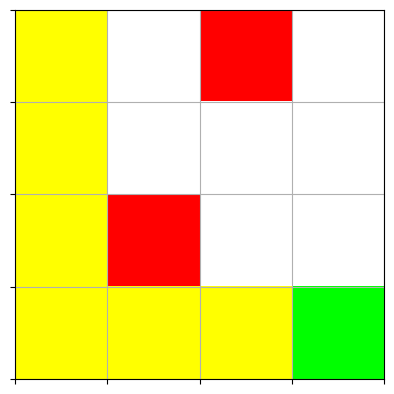

In [12]:
def step(state, action):
    x, y = state

    if action == 0 and x > 0:
        x -= 1
    elif action == 1 and x < GridSize - 1:
        x += 1
    elif action == 2 and y > 0:
        y -= 1
    elif action == 3 and y < GridSize - 1:
        y += 1

    next_state = (x, y)

    if next_state == Goal:
        reward = 100
    elif next_state in Trap:
        reward = -10
    else:
        reward = -1

    return next_state, reward

plt.ion()
fig, ax = plt.subplots()

def draw_grid(state=None, path=None, final=False):
    grid = np.ones((GridSize, GridSize, 3))

    for i in range(GridSize):
        for j in range(GridSize):
            if (i, j) == Goal:
                grid[i, j] = [0, 1, 0]      # goal
            elif (i, j) in Trap:
                grid[i, j] = [1, 0, 0]      # trap
            elif path and (i, j) in path:
                grid[i, j] = [1, 1, 0]      # learned path
            elif state is not None and (i, j) == state:
                grid[i, j] = [0, 0, 1]      # agent

    ax.clear()
    ax.imshow(grid)
    ax.set_xticks(np.arange(-0.5, GridSize, 1))
    ax.set_yticks(np.arange(-0.5, GridSize, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    fig.canvas.draw()
    fig.canvas.flush_events()

    if not final:
        time.sleep(Delay)


for ep in range(Episodes): # Training the Q-Learn Algorithm
    state = (0, 0)
    print(f"\nEpisode {ep+1}")

    while state != Goal and state not in Trap:

        if random.random() < Epsilon:
            action = random.randint(0, 3)
            mode = "Exploring"
        else:
            if np.all(Q[state[0], state[1]] == 0):
                action = random.randint(0, 3)
                mode = "Exploring"
            else:
                action = np.argmax(Q[state[0], state[1]])
                mode = "Exploiting"

        next_state, reward = step(state, action)

        old_q = Q[state[0], state[1], action]
        Q[state[0], state[1], action] += Alpha * (
            reward + Gamma * np.max(Q[next_state[0], next_state[1]])
            - Q[state[0], state[1], action]
        )

        draw_grid(next_state)

        print(f"State {state}, Action {ActionsList[action]}, "
              f"Reward {reward}, Next {next_state}, "
              f"{mode}, Q {old_q:.2f} → {Q[state[0],state[1],action]:.2f}")

        state = next_state


state = (0, 0) # Final Learned Path starts here
optimal_path = [state]

while state != Goal:
    action = np.argmax(Q[state[0], state[1]])

    if action == 0 and state[0] > 0:
        state = (state[0]-1, state[1])
    elif action == 1 and state[0] < GridSize-1:
        state = (state[0]+1, state[1])
    elif action == 2 and state[1] > 0:
        state = (state[0], state[1]-1)
    elif action == 3 and state[1] < GridSize-1:
        state = (state[0], state[1]+1)

    if state in optimal_path:
        break

    optimal_path.append(state)


draw_grid(state=None, path=optimal_path, final=True)
plt.ioff()
plt.show()
